# Tarea 1

Para poder comenzar, se tiene que clonar el repositorio https://github.com/AlexG1991/tarea1_scraper, en donde se encuentra el proyecto de scrapper para poder obtener textos de artículos de wikipedia y con esto dar como resultado el insumo para el análisis que es el archivo "result.json", que es donde se encuentran guardados todos los artículos. Para afectos prácticos, en el repositorio ya se encuentra un archivo result.json

In [41]:
#Leer archivo
import json
import re
import nltk
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter

with open('result.json') as json_file:
    data = json.load(json_file)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rgarciad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
def calculate_vocabulary(num_tokens):
    vocabulario = set()
    stems = set()
    lems = set()
    tokens = []
    max_tokens = num_tokens
    current_tokens = 0

    for document in data:
        if(current_tokens < max_tokens):
            text = document['body']['paragraph']
            text_lower = text.lower()
            words = re.split('\W+', text_lower)
            for word in words:
                if(current_tokens < max_tokens):
                    tokens.append(word)
                    vocabulario.add(word)
                    current_tokens = current_tokens + 1
                else:
                    break
        else:
            break

    #vocabulario palabras      
    count_palabras = len(vocabulario)

    #vocabulario stems
    ps = PorterStemmer()
    for token in tokens:
        stems.add(ps.stem(token))

    count_stems = len(stems)

    #vocabulario lemas

    lemmatizer = WordNetLemmatizer()
    for token in tokens:
        lems.add(lemmatizer.lemmatize(token))

    count_lems = len(lems)

    counts = Counter(tokens)

    return count_palabras,count_stems,count_lems

In [51]:
#calculate values
count_palabras_100,count_stems_100,count_lems_100 = calculate_vocabulary(100)
count_palabras_1000,count_stems_1000,count_lems_1000 = calculate_vocabulary(1000)
count_palabras_5000,count_stems_5000,count_lems_5000 = calculate_vocabulary(5000)
count_palabras_10000,count_stems_10000,count_lems_10000 = calculate_vocabulary(10000)
count_palabras_100000,count_stems_100000,count_lems_100000 = calculate_vocabulary(100000)
count_palabras_250000,count_stems_250000,count_lems_250000 = calculate_vocabulary(250000)
count_palabras_500000,count_stems_500000,count_lems_500000 = calculate_vocabulary(500000)
count_palabras_750000,count_stems_750000,count_lems_750000 = calculate_vocabulary(750000)
count_palabras_1000000,count_stems_1000000,count_lems_1000000 = calculate_vocabulary(1000000)
print(count_palabras_1000000)

36194


In [57]:
#Dataframe de resultados de repetidas
import pandas as pd
resultados = pd.DataFrame()
resultados['Rubro'] = ['100','1K','5K','10K','100K','250K','500K','750K','1M']
resultados['Words'] = [count_palabras_100,count_palabras_1000,count_palabras_5000,count_palabras_10000,count_palabras_100000,count_palabras_250000,count_palabras_500000,count_palabras_750000,count_palabras_1000000]
resultados['Stems'] = [count_stems_100,count_stems_1000,count_stems_5000,count_stems_10000,count_stems_100000,count_stems_250000,count_stems_500000,count_stems_750000,count_stems_1000000]
resultados['Lems'] = [count_lems_100,count_lems_1000,count_lems_5000,count_lems_10000,count_lems_100000,count_lems_250000,count_lems_500000,count_lems_750000,count_lems_1000000]
resultados.set_index('Rubro')
resultados

,Rubro,Words,Stems,Lems
0,100,64,64,64
1,1K,401,375,390
2,5K,1487,1307,1432
3,10K,2597,2209,2475
4,100K,10922,7942,9858
5,250K,18468,13351,16688
6,500K,25747,18645,23318
7,750K,31574,22935,28606
8,1M,36194,26430,32840


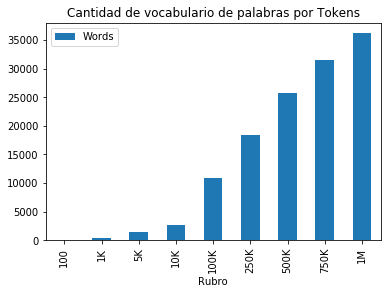

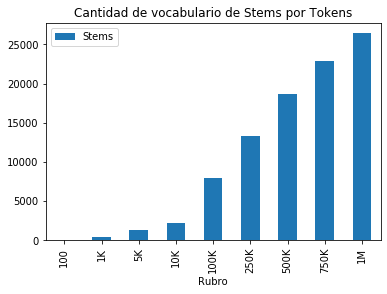

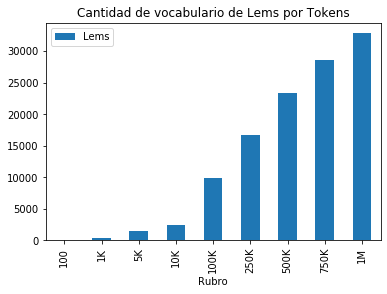

In [59]:
#Graficar resultados
resultados.plot("Rubro","Words",kind='bar',title="Cantidad de vocabulario de palabras por Tokens")
resultados.plot("Rubro","Stems",kind='bar',title="Cantidad de vocabulario de Stems por Tokens")
resultados.plot("Rubro","Lems",kind='bar',title="Cantidad de vocabulario de Lems por Tokens")